In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
import zipfile

In [3]:
z = zipfile.ZipFile('all korea.zip')

In [4]:
f = z.open('삼성전자.csv')

In [5]:
df = pd.read_csv(f)

In [6]:
df.head()

,Unnamed: 0,날짜,시가,고가,저가,종가,거래량
0,0,20210129,84500,85000,82000,82000,39615978
1,1,20210128,83200,85600,83200,83700,31859808
2,2,20210127,86600,87700,85600,85600,26423070
3,3,20210126,88800,89200,86500,86700,33178936
4,4,20210125,87000,89900,86300,89400,27258534


하나씩 해보기

    def Year_situation_test(df, input_year):

In [7]:
# 열 이름 바꾸기
df.rename(columns={'날짜': '일자', 
                       '시가': '시가',
                       '고가':'최고가',
                       '저가':'최저가',
                       '종가':'종가'}, inplace=True)

df.head()

,Unnamed: 0,일자,시가,최고가,최저가,종가,거래량
0,0,20210129,84500,85000,82000,82000,39615978
1,1,20210128,83200,85600,83200,83700,31859808
2,2,20210127,86600,87700,85600,85600,26423070
3,3,20210126,88800,89200,86500,86700,33178936
4,4,20210125,87000,89900,86300,89400,27258534


In [8]:
# Unnamed:0 제거
df.drop(df.columns[[0]], axis=1, inplace=True)
    df.head()

,일자,시가,최고가,최저가,종가,거래량
0,20210129,84500,85000,82000,82000,39615978
1,20210128,83200,85600,83200,83700,31859808
2,20210127,86600,87700,85600,85600,26423070
3,20210126,88800,89200,86500,86700,33178936
4,20210125,87000,89900,86300,89400,27258534


In [10]:
# 일자를 str으로 바꾸고 다시 date로 바꾼다.
df['date']= df['일자'].astype('str')
df['datetime'] =  pd.to_datetime(df['date'], format='%Y/%m/%d')
    
df.head()

,일자,시가,최고가,최저가,종가,거래량,date,datetime
0,20210129,84500,85000,82000,82000,39615978,20210129,2021-01-29
1,20210128,83200,85600,83200,83700,31859808,20210128,2021-01-28
2,20210127,86600,87700,85600,85600,26423070,20210127,2021-01-27
3,20210126,88800,89200,86500,86700,33178936,20210126,2021-01-26
4,20210125,87000,89900,86300,89400,27258534,20210125,2021-01-25


In [11]:
# datetime 행 생성
df.set_index(df['datetime'], inplace=True)
df.head()

,일자,시가,최고가,최저가,종가,거래량,date,datetime
datetime,,,,,,,,
2021-01-29,20210129,84500,85000,82000,82000,39615978,20210129,2021-01-29
2021-01-28,20210128,83200,85600,83200,83700,31859808,20210128,2021-01-28
2021-01-27,20210127,86600,87700,85600,85600,26423070,20210127,2021-01-27
2021-01-26,20210126,88800,89200,86500,86700,33178936,20210126,2021-01-26
2021-01-25,20210125,87000,89900,86300,89400,27258534,20210125,2021-01-25


In [12]:
# 년월일 열 생성
df['년'] = pd.DatetimeIndex(df['datetime']).year
df['월'] = pd.DatetimeIndex(df['datetime']).month
df['일'] = pd.DatetimeIndex(df['datetime']).day

df.head()

,일자,시가,최고가,최저가,종가,거래량,date,datetime,년,월,일
datetime,,,,,,,,,,,
2021-01-29,20210129,84500,85000,82000,82000,39615978,20210129,2021-01-29,2021,1,29
2021-01-28,20210128,83200,85600,83200,83700,31859808,20210128,2021-01-28,2021,1,28
2021-01-27,20210127,86600,87700,85600,85600,26423070,20210127,2021-01-27,2021,1,27
2021-01-26,20210126,88800,89200,86500,86700,33178936,20210126,2021-01-26,2021,1,26
2021-01-25,20210125,87000,89900,86300,89400,27258534,20210125,2021-01-25,2021,1,25


In [13]:
# 필요한 것만 두고 나머지 제거
df = df.drop('datetime', 1)
df = df.drop('일자', 1)
df = df.drop('date', 1)
df = df.drop('거래량', 1)

df.head()

,시가,최고가,최저가,종가,년,월,일
datetime,,,,,,,
2021-01-29,84500,85000,82000,82000,2021,1,29
2021-01-28,83200,85600,83200,83700,2021,1,28
2021-01-27,86600,87700,85600,85600,2021,1,27
2021-01-26,88800,89200,86500,86700,2021,1,26
2021-01-25,87000,89900,86300,89400,2021,1,25


In [14]:
df.tail()

,시가,최고가,최저가,종가,년,월,일
datetime,,,,,,,
2007-08-13,12120,12340,12020,12260,2007,8,13
2007-08-10,12120,12160,11960,12060,2007,8,10
2007-08-09,12400,12500,12320,12420,2007,8,9
2007-08-08,11800,12040,11740,12040,2007,8,8
2007-08-07,11900,11920,11640,11680,2007,8,7


In [16]:
# 빈 data frame 만들기
df_year = []   

# 1980년부터 41년동안 연도별로 정렬해서 df_year 만들기
for i in range(41) :
    Y = 1980 + i
    year = pd.DataFrame(df[df['년'] == Y])
    df_year.append(year)

In [29]:
len(df_year)

41

In [30]:
df_year[40]

,시가,최고가,최저가,종가,년,월,일
datetime,,,,,,,
2020-12-30,77400,81300,77300,81000,2020,12,30
2020-12-29,78800,78900,77300,78300,2020,12,29
2020-12-28,79000,80100,78200,78700,2020,12,28
2020-12-24,74100,78800,74000,77800,2020,12,24
2020-12-23,72400,74000,72300,73900,2020,12,23
...,...,...,...,...,...,...,...
2020-01-08,56200,57400,55900,56800,2020,1,8
2020-01-07,55700,56400,55600,55800,2020,1,7
2020-01-06,54900,55600,54600,55500,2020,1,6


In [32]:
# input_year 는 함수에 입력하는 연도라서 일단 여기서는 2017을 임의로 두겠습니다.
input_year = 2017
result = df_year[input_year-1980]

In [34]:
result

,시가,최고가,최저가,종가,년,월,일
datetime,,,,,,,
2017-12-28,49560,50960,49500,50960,2017,12,28
2017-12-27,48960,49560,48460,49360,2017,12,27
2017-12-26,49760,50100,48200,48200,2017,12,26
2017-12-22,49400,49960,49240,49700,2017,12,22
2017-12-21,51000,51060,49100,49140,2017,12,21
...,...,...,...,...,...,...,...
2017-01-06,36180,36440,36040,36200,2017,1,6
2017-01-05,36060,36060,35540,35560,2017,1,5
2017-01-04,36500,36520,36100,36160,2017,1,4


In [35]:
# result 에서 날짜 시가 종가 빼고 필요없는 것 빼기
result = result.reset_index()
result.drop('최고가', 1,inplace=True)
result.drop('최저가', 1,inplace=True)
result.drop('년', 1,inplace=True)
result.drop('월', 1,inplace=True)
result.drop('일', 1,inplace=True)

result

,datetime,시가,종가
0,2017-12-28,49560,50960
1,2017-12-27,48960,49360
2,2017-12-26,49760,48200
3,2017-12-22,49400,49700
4,2017-12-21,51000,49140
...,...,...,...
238,2017-01-06,36180,36200
239,2017-01-05,36060,35560
240,2017-01-04,36500,36160
241,2017-01-03,36280,36480


In [37]:
# 수익률 계산을 위해 x, y train set 지정
y_train = result['종가']
x_train = result['시가']

In [38]:
print(y_train, x_train)

0      50960
1      49360
2      48200
3      49700
4      49140
       ...  
238    36200
239    35560
240    36160
241    36480
242    36100
Name: 종가, Length: 243, dtype: int64 0      49560
1      48960
2      49760
3      49400
4      51000
       ...  
238    36180
239    36060
240    36500
241    36280
242    35980
Name: 시가, Length: 243, dtype: int64


In [39]:
# 결과에 수익률도 추가
Ratio_return = (y_train - x_train) / x_train
result['수익률'] = Ratio_return

result

,datetime,시가,종가,수익률
0,2017-12-28,49560,50960,0.028249
1,2017-12-27,48960,49360,0.008170
2,2017-12-26,49760,48200,-0.031350
3,2017-12-22,49400,49700,0.006073
4,2017-12-21,51000,49140,-0.036471
...,...,...,...,...
238,2017-01-06,36180,36200,0.000553
239,2017-01-05,36060,35560,-0.013866
240,2017-01-04,36500,36160,-0.009315
241,2017-01-03,36280,36480,0.005513


In [40]:
# weight sum 비교
# 동일가중치
uni_weight = 1/len(result)
for i in range(len(result)):
    uni_weight_sum = np.sum(uni_weight * Ratio_return.iloc[i])
print('동일가중치 :', uni_weight_sum)

동일가중치 : 1.3725046150467682e-05


$$ \text{동일가중치 : } \frac{ \text{수익률} }{ \text{햇수}} $$

In [41]:
# 가치가중치
val_weight = 0
val_weight_sum = 0
for i in range(len(result)):
    val_weight = (2*(len(result)-i)) / ((1+len(result))*((len(result))))
    val_weight_sum = np.sum(val_weight * Ratio_return.iloc[i])
print('가치가중치 :', val_weight_sum)

가치가중치 : 1.1250037828252198e-07


$$ \text{가치가중치 : } \frac{2 \times \text{지나온 햇수}}{(1+ \text{햇수}) \times ( \text{햇수})} \\ \text{지나온 햇수 예 : 2010년이면 11년 지났으니 11}$$ 

In [42]:
# 거래 후 가치
return_val = 0

# 초기 자금
money = 1e6

for i in range(len(result)):
    return_val = money * Ratio_return[i] + money
    money = return_val
print(return_val)

1092111.1704521202


In [43]:
# 초기 자금
money = 1e6

# 종가 - 시가
final = result['종가']
start = result['시가']
get = final.iloc[0]- start.iloc[-1]

epsilon = 1e5

In [44]:
# 호황 불황 결정
if (get<0):
    print('불황')

else :
    if ((val_weight_sum<0) & (uni_weight_sum<0)):
        if (abs(val_weight_sum)< epsilon) :
            print('호황')
        else :
            print('모른다')
    elif val_weight_sum - uni_weight_sum > 0 : 
        print('호황')
    else :
        print('불황')
print(result)

불황
      datetime     시가     종가       수익률
0   2017-12-28  49560  50960  0.028249
1   2017-12-27  48960  49360  0.008170
2   2017-12-26  49760  48200 -0.031350
3   2017-12-22  49400  49700  0.006073
4   2017-12-21  51000  49140 -0.036471
..         ...    ...    ...       ...
238 2017-01-06  36180  36200  0.000553
239 2017-01-05  36060  35560 -0.013866
240 2017-01-04  36500  36160 -0.009315
241 2017-01-03  36280  36480  0.005513
242 2017-01-02  35980  36100  0.003335

[243 rows x 4 columns]


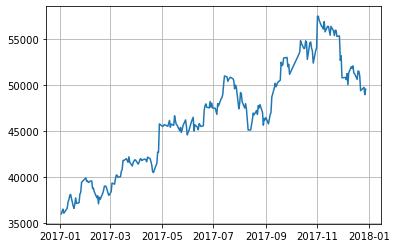

In [45]:
# 그래프 그리기
time = result.datetime
price = result.iloc[:,1]
plt.plot(time, price,'-')
plt.grid()

곱셈으로 바꿔보자

In [96]:
# test
a = [1, 2, 3, 4, 5]

test_mul = 1
for i in range(len(a)-1) :
    test = a[i+1]
    test_mul = test_mul * test
print('곱 :', test_mul)

곱 : 120


In [99]:
# 동일가중치
uni_weight = 1/len(result)
uni_weight_mul = (Ratio_return.iloc[0] + 1) * uni_weight

for i in range(len(result)-1):
    uni_weight = (Ratio_return.iloc[i+1] + 1) * uni_weight
    uni_weight_mul = uni_weight_mul * uni_weight - 1
print('동일가중치(곱) :', uni_weight_mul)

동일가중치(곱) : -1.0043899386697064


$$ \text{가치가중치 : } \frac{2 \times \text{지나온 햇수}}{(1+ \text{햇수}) \times ( \text{햇수})} \\ \text{지나온 햇수 예 : 2010년이면 11년 지났으니 11}$$ 

In [101]:
# 가치가중치

val_weight_mul = (2*(len(result))) / ((1+len(result))*((len(result)))) + 1

for i in range(len(result)-1):
    val_weight = (2*(len(result)-i+1)) / ((1+len(result))*((len(result)))) + 1
    val_weight_mul = val_weight * Ratio_return.iloc[i+1] * val_weight_mul - 1
print('가치가중치 :', val_weight_mul)

가치가중치 : -1.0033537449118208


In [102]:
# 호황 불황 결정
if (get<0):
    print('불황')

else :
    if ((val_weight_sum<0) & (uni_weight_sum<0)):
        if (abs(val_weight_sum)< epsilon) :
            print('호황')
        else :
            print('모른다')
    elif val_weight_sum - uni_weight_sum > 0 : 
        print('호황')
    else :
        print('불황')
print(result)

불황
      datetime     시가     종가       수익률
0   2017-12-28  49560  50960  0.028249
1   2017-12-27  48960  49360  0.008170
2   2017-12-26  49760  48200 -0.031350
3   2017-12-22  49400  49700  0.006073
4   2017-12-21  51000  49140 -0.036471
..         ...    ...    ...       ...
238 2017-01-06  36180  36200  0.000553
239 2017-01-05  36060  35560 -0.013866
240 2017-01-04  36500  36160 -0.009315
241 2017-01-03  36280  36480  0.005513
242 2017-01-02  35980  36100  0.003335

[243 rows x 4 columns]


함수 설정

In [46]:
def Year_situation_test(df, input_year):
    df.rename(columns={'날짜': '일자', 
                       '시가': '시가',
                       '고가':'최고가',
                       '저가':'최저가',
                       '종가':'종가'}, inplace=True)
    df.drop(df.columns[[0]], axis=1, inplace=True)
    df['date']= df['일자'].astype('str')
    df['datetime'] =  pd.to_datetime(df['date'], format='%Y/%m/%d')
    df.set_index(df['datetime'], inplace=True)
    df['년'] = pd.DatetimeIndex(df['datetime']).year
    df['월'] = pd.DatetimeIndex(df['datetime']).month
    df['일'] = pd.DatetimeIndex(df['datetime']).day

    df = df.drop('datetime', 1)
    df = df.drop('일자', 1)
    df = df.drop('date', 1)
    df = df.drop('거래량', 1)

    df_year = []   
    for i in range(41) :
        Y = 1980 + i
        year = pd.DataFrame(df[df['년'] == Y])
        df_year.append(year)
    result = df_year[input_year-1980]

    result = result.reset_index()
    result.drop('최고가', 1,inplace=True)
    result.drop('최저가', 1,inplace=True)
    result.drop('년', 1,inplace=True)
    result.drop('월', 1,inplace=True)
    result.drop('일', 1,inplace=True)
    
    y_train = result['종가']
    x_train = result['시가']
    Ratio_return = (y_train - x_train) / x_train
    result['수익률'] = Ratio_return
    
    # weight sum 비교
    uni_weight = 1/len(result)
    for i in range(len(result)):
        uni_weight_sum = np.sum(uni_weight * Ratio_return.iloc[i])
    print('동일가중치 :', uni_weight_sum)

    val_weight = 0
    val_weight_sum = 0
    for i in range(len(result)):
        val_weight = (2*(len(result)-i)) / ((1+len(result))*((len(result))))
        val_weight_sum = np.sum(val_weight * Ratio_return.iloc[i])
    print('가치가중치 :', val_weight_sum)
    
    # 하루 단위 거래
    return_val = 0
    money = 1e6
    for i in range(len(result)):
        return_val = money * Ratio_return[i] + money
        money = return_val
    print(return_val)

    money = 1e6

    final = result['종가']
    start = result['시가']
    get = final.iloc[0]- start.iloc[-1]
    epsilon = 1e5
    if (get<0):
        print('불황')

    else :
        if ((val_weight_sum<0) & (uni_weight_sum<0)):
            if (abs(val_weight_sum)< epsilon) :
                print('호황')
            else :
                print('모른다')
        elif val_weight_sum - uni_weight_sum > 0 : 
            print('호황')
        else :
            print('불황')
    print(result)
    time = result.datetime
    price = result.iloc[:,1]
    plt.plot(time, price,'-')
    plt.grid()

동일가중치 : 1.3725046150467682e-05
가치가중치 : 1.1250037828252198e-07
1092111.1704521202
불황
      datetime     시가     종가       수익률
0   2017-12-28  49560  50960  0.028249
1   2017-12-27  48960  49360  0.008170
2   2017-12-26  49760  48200 -0.031350
3   2017-12-22  49400  49700  0.006073
4   2017-12-21  51000  49140 -0.036471
..         ...    ...    ...       ...
238 2017-01-06  36180  36200  0.000553
239 2017-01-05  36060  35560 -0.013866
240 2017-01-04  36500  36160 -0.009315
241 2017-01-03  36280  36480  0.005513
242 2017-01-02  35980  36100  0.003335

[243 rows x 4 columns]


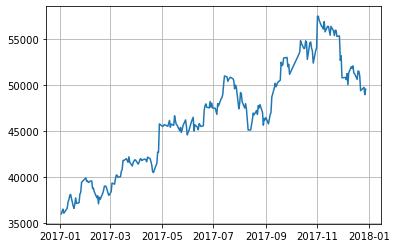

In [26]:
Year_situation_test(df, 2017)